In [179]:
import os
import torch
import random
import numpy as np
import pandas as pd
import torch.nn as torchNN
import torch.nn.functional as torchF
import matplotlib.pyplot as plt
import gymnasium as gym

from itertools import count
from IPython import display
from collections import namedtuple, deque

%matplotlib inline

In [180]:
Transition = namedtuple('Transition', ('nowState', 'action', 'nextState', 'reward'))
class MemoryPool():
    def __init__(self, capacity) -> None:
        self.memory = deque([], maxlen = capacity)
    
    def AddMemory(self, *arg):
        self.memory.append(Transition(*arg))
    
    def Sample(self, BATCHSIZE):
        return random.sample(self.memory, BATCHSIZE)

    def __len__(self):
        return len(self.memory)

In [181]:
# Add network policy and target
class Network(torchNN.Module):
    def __init__(self, stateNum, actionNum, hiddenUnits) -> None:
        super().__init__()
        self.liner = torchNN.Sequential(
            torchNN.Linear(stateNum, hiddenUnits),
            torchNN.LeakyReLU(),
            torchNN.Linear(hiddenUnits, hiddenUnits),
            torchNN.LeakyReLU(),
            torchNN.Linear(hiddenUnits, actionNum),
        )

    def forward(self, nowState):
        return self.liner(nowState)

In [182]:
env = gym.make("CartPole-v1")
STATENUM = env.observation_space.shape[0]
ACTIONNUM = env.action_space.n
HIDDENUNITS = 128
EPISOLD = 0.6
POOLCAPACITY = 10000
LR = 0.003
BATCHSIZE = 128
GAMMA = 0.9
SIGMA = 0.005
EPOCHES = 100
SAVEDPATH = '../SavedModel/DQN/dqn1.pth'
CALLBACK = '../CallBack/DQN/dqn1.csv'

dqnNetwork = DQNModel(
    STATENUM,
    ACTIONNUM,
    HIDDENUNITS,
    EPISOLD,
    POOLCAPACITY,
    env,
    LR,
    BATCHSIZE,
    GAMMA,
    SIGMA
)

In [183]:
if os.path.exists(SAVEDPATH):
    dqnNetwork.LoadNetwork(SAVEDPATH)

history = {
    'step': [],
}

if os.path.exists(CALLBACK):
    backValue = pd.read_csv(CALLBACK)
    history['step'] += list(backValue['step'])

for i in range(EPOCHES):
    step = dqnNetwork.TrainOneEpoch()
    history['step'].append(step)
    
    if (i + 1) % 10 == 0:
        dqnNetwork.SaveNetwork(SAVEDPATH)

meanPlot = sum(history['step']) / len(history['step'])
print(meanPlot)
callbackCSV = pd.DataFrame(history)
callbackCSV.to_csv(CALLBACK)

29.865


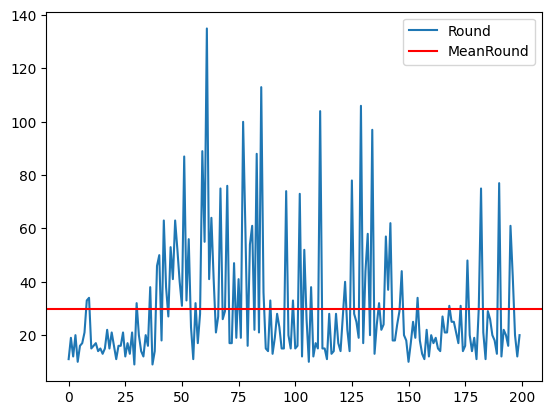

In [184]:
plt.plot(history['step'], label = 'Round')
plt.axhline(y = meanPlot, xmin = 0, xmax = 1, label = 'MeanRound', color = 'red')
plt.legend()